<a href="https://colab.research.google.com/github/ankitkarmakar95/learnings/blob/main/bank_defaulter_prediction_using_K_nearest_neighber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [4]:
#reading data from input csv file
defaulter = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/defaulter.csv")
defaulter


,defaulter,student,balance,income
0,No,Yes,817.1804,12106.14
1,Yes,Yes,1486.9980,17854.40
2,Yes,Yes,1102.4350,17391.78
3,Yes,Yes,1233.4460,12586.48
4,Yes,Yes,1276.6850,19282.44
5,Yes,Yes,1289.2460,13624.55
6,No,Yes,673.8124,17672.29
7,No,No,870.4124,17685.45
8,No,Yes,903.1768,15810.57
9,No,Yes,879.6270,14898.31


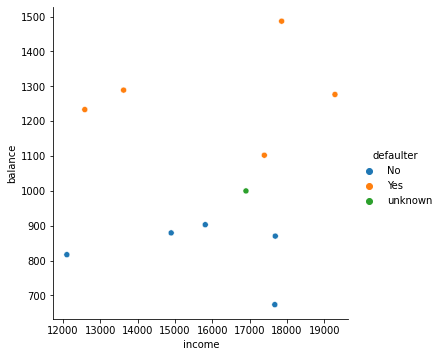

In [5]:
sns.pairplot(defaulter,hue="defaulter",
             x_vars="income",y_vars="balance",height=5)

Finding uclidian distance between two instances

In [8]:
x1 = defaulter.loc[9,["balance","income"]]
x2 = defaulter.loc[1,["balance","income"]]
np.linalg.norm(x1-x2)

3017.8415498069166

as, one of the attribute may have very high value, then the other attributes will loose their significance. So we need to always normalise the value set. Although it is a good practice to have normalizasion of data sets before running any machine learning algorithms.
There are so many methods for this in sklearn.preprocessing

In [10]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(defaulter[["balance","income"]])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]
defaulter

,defaulter,student,balance,income,norm_balance,norm_income
0,No,Yes,817.1804,12106.14,0.176304,0.000000
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587
6,No,Yes,673.8124,17672.29,0.000000,0.775630
7,No,No,870.4124,17685.45,0.241765,0.777463
8,No,Yes,903.1768,15810.57,0.282057,0.516203
9,No,Yes,879.6270,14898.31,0.253097,0.389082


In [23]:
x1_n = defaulter.loc[0,["norm_balance","norm_income"]]
x2_n = defaulter.loc[1,["norm_balance","norm_income"]]
np.linalg.norm(x1_n-x2_n)

1.1489497815843788

In [24]:
x11 = defaulter.loc[10,["norm_balance","norm_income"]] 
dist_to_X11 = lambda x: np.linalg.norm(x-x11)

In [30]:
defaulter["dist_toX11"] = defaulter[["norm_balance","norm_income"]].apply(dist_to_X11,axis=1)

In [31]:
defaulter.sort_values("dist_toX11")

,defaulter,student,balance,income,norm_balance,norm_income,dist_toX11
10,unknown,Yes,1000.0000,16900.00,0.401123,0.668013,0.000000
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541,0.143401
8,No,Yes,903.1768,15810.57,0.282057,0.516203,0.192932
7,No,No,870.4124,17685.45,0.241765,0.777463,0.193325
9,No,Yes,879.6270,14898.31,0.253097,0.389082,0.315775
6,No,Yes,673.8124,17672.29,0.000000,0.775630,0.415309
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000,0.475378
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587,0.578657
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006,0.613466
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934,0.666114


Recall that the kNN algorithm identifies the k nearest neighbors of a new tuple and assigns it a class label based on the class labels of its nearest neighbors. 

Let us consider the value of k as 1, which means that, the kNN algorithm assigns a class label based on its nearest neighbor. The kNN algorithm would therefore classify the tuple X11 as default= Yes based on its nearest neighbor X3 (tuple at index 2) since the nearest neighbor (X3) has a class label of default=Yes.

For all values of k greater than 1, a data tuple is classified by a majority vote of its neighbors. The tuple will be assigned the class that is most common among its k nearest neighbors.

If the value of k was selected as 3, the 3-nearest-neighbors of the data tuple X11 (balance=1000, income=16900) are identified. In this case they are X3 (balance=1102.435, income=17391.78, defaulter=Yes), X9(balance=903.1768, income=15810.57, defaulter=No) and X8(balance=870.4124, income=17685.45, defaulter=No) based on the Euclidean distances computed earlier.

The new tuple would be classified as defaulter/non-defaulter based on the majority vote of the neighbors X3, X9 and X8. In this case, the majority vote indicates that the new tuple (X11) would be a non-defaulter.

***building one model using sklearn***

In [33]:
X=defaulter[['norm_balance','norm_income']]
Y=defaulter['defaulter']

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [36]:
model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
model.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [37]:
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)

0.75 1.0


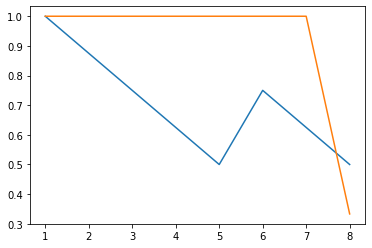

In [42]:
train_accuracies = []
test_accuracies = []
# building KNN model for values of k from 1 to 100
k_vals = [i for i in range(1,9)]
features = ["norm_balance","norm_income"]
target = "defaulter"
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(X_train,Y_train)
    train_accuracy_k = model.score(X_train,Y_train)
    test_accuracy_k = model.score(X_test,Y_test)
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)
plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)


In [56]:
model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
model.fit(X_train,Y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

# ***Predicting some cases***

In [54]:
model.predict(X=[[0.25,0.38]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['No'], dtype=object)

In [55]:
model.predict(X=[[0.78,0.22]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Yes'], dtype=object)